<a href="https://colab.research.google.com/github/Bhaveshsingh9999/spamclassfier/blob/main/SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [4]:
df.shape # we have 5572 test message

(5572, 5)

# first we will do data cleaning

In [5]:
df.info() # we infer that the column 2 ,3,4 hardly have any values so we will remove them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.rename(columns={'v1':'label','v2':'text'},inplace=True) # renaing the columns

In [7]:
df.sample(5)

,label,text
5223,ham,If I die I want u to have all my stuffs.
1026,ham,Yes da. Any plm at ur office
1544,ham,After completed degree. There is no use in joi...
5195,ham,Darren was saying dat if u meeting da ge den w...
692,ham,"My sister in law, hope you are having a great ..."


In [8]:
#changing the label to 0 and 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label']=encoder.fit_transform(df['label'])

In [9]:
#check for missing values
df.isnull().sum()

label    0
text     0
dtype: int64

In [10]:
#check for duplicate values
df.duplicated().sum()

403

In [11]:
# we need to remove duplicate values
df=df.drop_duplicates(keep='first')

part 2 EDA

In [12]:
# we will check if the dataset is balanced or not
df['label'].value_counts()  # 1 - spam 0- normal message so spam message is less in dataset

0    4516
1     653
Name: label, dtype: int64

In [13]:
# we add new cols no of chars , no of words , no of sentence
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
df['num_char_count']=df['text'].apply(len)
df.head(5)

,label,text,num_char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
#adding col for number of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [16]:
#adding no of sentence
df['num_sentence']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [17]:
df.head(5)

,label,text,num_char_count,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
#ham
df[df['label']==0][['num_char_count','num_words','num_sentence']].describe()

,num_char_count,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
#spam
df[df['label']==1][['num_char_count','num_words','num_sentence']].describe()

,num_char_count,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [20]:
# we infer that number of char used in spam are more as compared to ham

<ipython-input-21-393393330b57>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

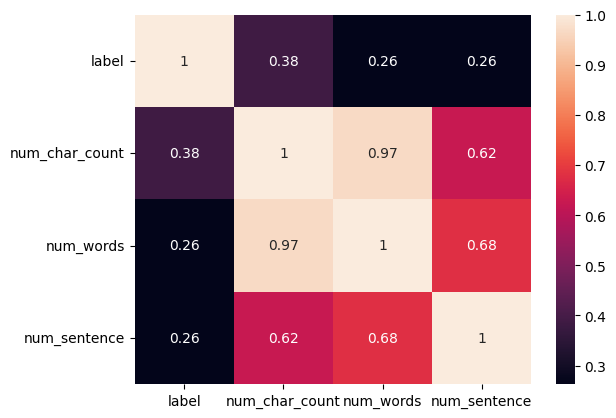

In [21]:
#looking at the correlation usinh a heat map
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
#the column are highly correlated with each other we num_char_count for further analysis

data preprocessing will do tokenization , remove stop words and do stemming

In [22]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [24]:
df['transformed_text']=df['text'].apply(transform_text)
df.head(5)

,label,text,num_char_count,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


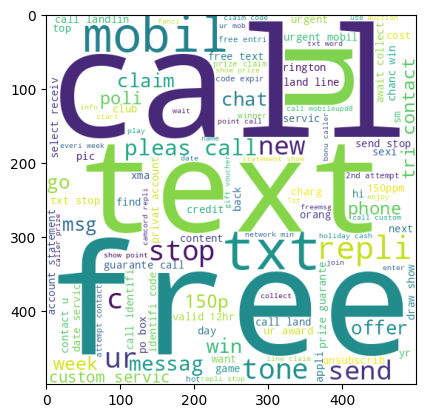

In [25]:
# we will look at word cloud to see the most words used in ham and spam messages
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" ")) #spam
plt.imshow(spam_wc)

In [26]:
#will see top 30 words in ham and spam messages

#for all the spam msg we take the words and append them in list spam_corpus
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)




In [34]:
from collections import Counter
Counter(spam_corpus).most_common(30) #top 30 common words in spam messages

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

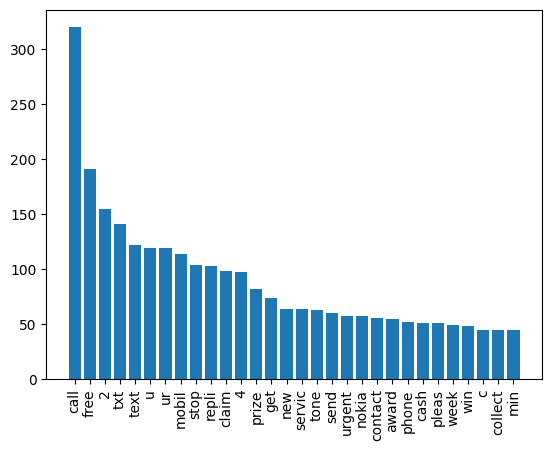

In [41]:
#we add these 30 words in a dataframe and do a bar plot
from collections import Counter
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


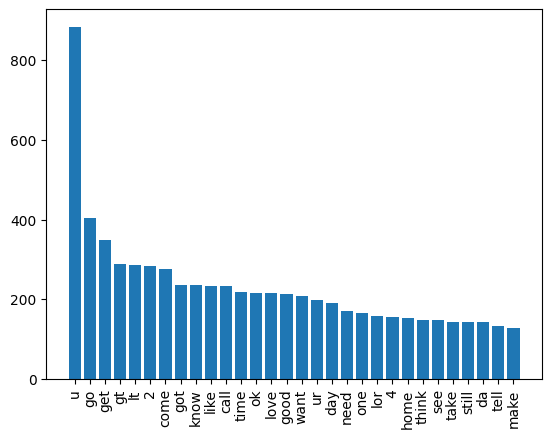

In [42]:
#similalry doing it for ham segrgating all the words that occus in ham messages and storing it in ham_corpus
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

from collections import Counter
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


Building model

In [68]:
#will convert the text message to number
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()


tfidf = TfidfVectorizer(max_features=3000) # taking top 3000 words

In [69]:
#x=cv.fit_transform(df['transformed_text']).toarray()
x=tfidf.fit_transform(df['transformed_text']).toarray()
x.shape

(5169, 3000)

In [70]:
y = df['label'].values

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [72]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
#diff between accu and precison

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [65]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [66]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
